# Fully-Connected Neural Nets

In [1]:
# As usual, a bit of setup
from __future__ import print_function
import time
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver
from cs231n.vis_utils import visualize_grid

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

('X_train: ', (49000, 3, 32, 32))
('y_train: ', (49000,))
('X_val: ', (1000, 3, 32, 32))
('y_val: ', (1000,))
('X_test: ', (1000, 3, 32, 32))
('y_test: ', (1000,))


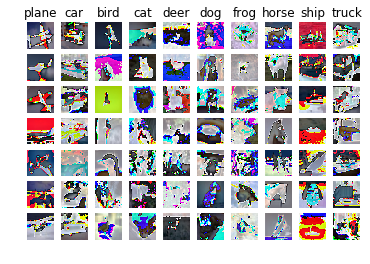

In [2]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in list(data.items()):
  print(('%s: ' % k, v.shape))


# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(data['y_train'] == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        img = data['X_train'][idx].astype('uint8')
        img = np.rollaxis(img, axis=0, start=3)
        plt.imshow(img)
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Two-layer network


In [3]:
# define model achitecture
model = TwoLayerNet()

# Instantiate solver class
solver = Solver(model, data, update_rule='sgd', optim_config={'learning_rate': 1e-3}, lr_decay=0.95, 
               num_epochs=10, batch_size=100, print_every=100)

# Train solver
solver.train()

(Iteration 1 / 4900) loss: 2.303611
(Epoch 0 / 10) train acc: 0.129000; val_acc: 0.135000
(Iteration 101 / 4900) loss: 1.910227
(Iteration 201 / 4900) loss: 1.804433
(Iteration 301 / 4900) loss: 1.616568
(Iteration 401 / 4900) loss: 1.436080
(Epoch 1 / 10) train acc: 0.454000; val_acc: 0.450000
(Iteration 501 / 4900) loss: 1.524862
(Iteration 601 / 4900) loss: 1.595310
(Iteration 701 / 4900) loss: 1.462205
(Iteration 801 / 4900) loss: 1.541403
(Iteration 901 / 4900) loss: 1.432072
(Epoch 2 / 10) train acc: 0.533000; val_acc: 0.471000
(Iteration 1001 / 4900) loss: 1.333854
(Iteration 1101 / 4900) loss: 1.428436
(Iteration 1201 / 4900) loss: 1.394994
(Iteration 1301 / 4900) loss: 1.570568
(Iteration 1401 / 4900) loss: 1.416577
(Epoch 3 / 10) train acc: 0.511000; val_acc: 0.492000
(Iteration 1501 / 4900) loss: 1.353059
(Iteration 1601 / 4900) loss: 1.324553
(Iteration 1701 / 4900) loss: 1.424821
(Iteration 1801 / 4900) loss: 1.391900
(Iteration 1901 / 4900) loss: 1.569188
(Epoch 4 / 10) t

```python
class TwoLayerNet(object):
    def __init__(self, input_dim=3*32*32, hidden_dim=100, num_classes=10,
    ¦   ¦   ¦   ¦weight_scale=1e-3, reg=0.0):
    ¦   Initialize a new network.
    ¦   self.params = {}
    ¦   self.reg = reg

    ¦   self.params['W1'] = weight_scale * np.random.randn(input_dim, hidden_dim)
    ¦   self.params['b1'] = np.zeros(hidden_dim)
    ¦   self.params['W2'] = weight_scale * np.random.randn(hidden_dim, num_classes)
    ¦   self.params['b2'] = np.zeros(num_classes)
```

```python
def loss(self, X, y=None):
        
        # forward pass
        scores = None
        out1, lay1_cache = affine_forward(X, self.params['W1'], self.params['b1'])
        act1, act1_cache = relu_forward(out1)
        scores, scores_cache = affine_forward(act1, self.params['W2'], self.params['b2'])
        
        ....
        
        # backward pass
        loss, dloss = softmax_loss(scores, y)
        dhidden, grads['W2'], grads['b2'] = affine_backward(dloss, scores_cache)
        dact1 = relu_backward(dhidden, act1_cache)
        _, grads['W1'], grads['b1'] = affine_backward(dact1, lay1_cache)
        
        return loss, grads
```

# Solver

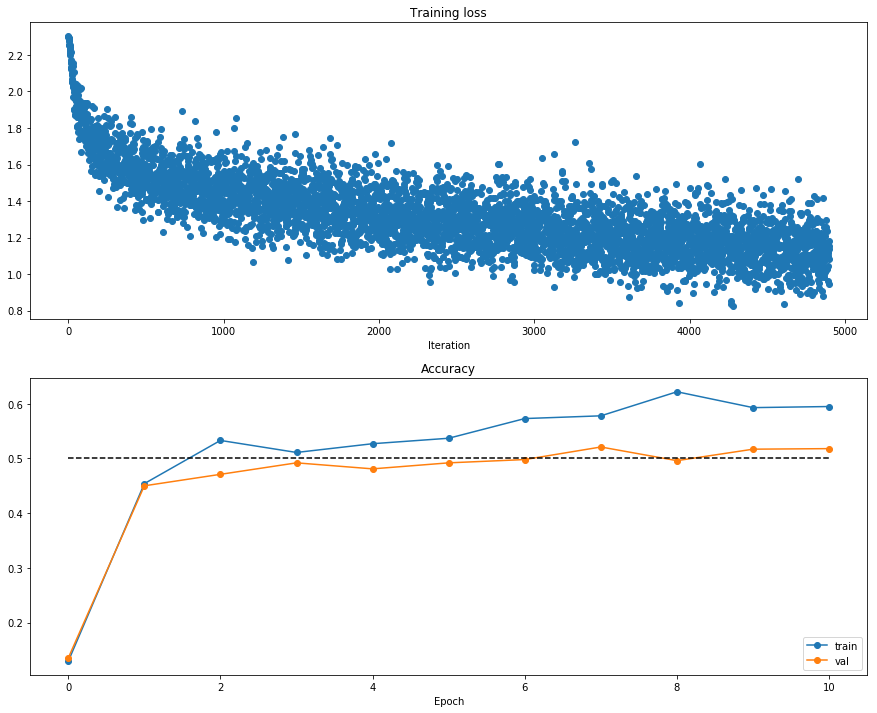

In [4]:
# Run this cell to visualize training loss and train / val accuracy
plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

# Multilayer network

As another sanity check, make sure you can overfit a small dataset of 50 images. First we will try a three-layer network with 100 units in each hidden layer. In the following cell, tweak the learning rate and initialization scale to overfit and achieve 100% training accuracy within 20 epochs.

(Iteration 1 / 40) loss: 269.577889
(Epoch 0 / 20) train acc: 0.280000; val_acc: 0.116000
(Epoch 1 / 20) train acc: 0.460000; val_acc: 0.125000
(Epoch 2 / 20) train acc: 0.620000; val_acc: 0.124000
(Epoch 3 / 20) train acc: 0.620000; val_acc: 0.157000
(Epoch 4 / 20) train acc: 0.780000; val_acc: 0.134000
(Epoch 5 / 20) train acc: 0.820000; val_acc: 0.142000
(Iteration 11 / 40) loss: 4.449300
(Epoch 6 / 20) train acc: 0.860000; val_acc: 0.139000
(Epoch 7 / 20) train acc: 0.940000; val_acc: 0.151000
(Epoch 8 / 20) train acc: 0.960000; val_acc: 0.142000
(Epoch 9 / 20) train acc: 0.940000; val_acc: 0.151000
(Epoch 10 / 20) train acc: 0.980000; val_acc: 0.163000
(Iteration 21 / 40) loss: 2.728358
(Epoch 11 / 20) train acc: 0.980000; val_acc: 0.159000
(Epoch 12 / 20) train acc: 0.960000; val_acc: 0.164000
(Epoch 13 / 20) train acc: 0.960000; val_acc: 0.164000
(Epoch 14 / 20) train acc: 1.000000; val_acc: 0.175000
(Epoch 15 / 20) train acc: 1.000000; val_acc: 0.174000
(Iteration 31 / 40) loss

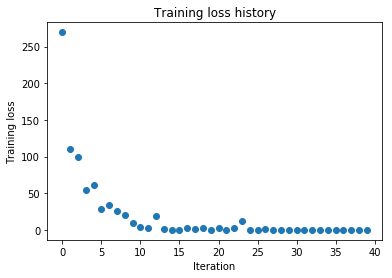

In [5]:
# TODO: Use a three-layer Net to overfit 50 training examples by 
# tweaking just the learning rate and initialization scale.

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

weight_scale = 1e-1
learning_rate = 5e-4
model = FullyConnectedNet([100, 100],
              weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

# Train a good model - tuning hyperparameters

In [10]:
from itertools import product

best_model = None
learning_rates = [1e-4, 5e-4, 1e-3]

for lr in learning_rates:
    
    print('Learning rate: {}'.format(lr))

    model = FullyConnectedNet([100, 75, 50, 25], input_dim=32*32*3, num_classes=10,
                            reg=1e-3, weight_scale=1e-2, dtype=np.float64)
    
    solver = Solver(model, data, update_rule='adam', optim_config={'learning_rate': lr}, lr_decay=0.95, 
               num_epochs=10, batch_size=200, print_every=500)

    solver.train()
    
    if best_model is None:
        best_model = model
        y_val_best = (np.argmax(best_model.loss(data['X_val']), axis=1) == data['y_val']).mean()
    else:
        y_val_pred = (np.argmax(model.loss(data['X_val']), axis=1) == data['y_val']).mean()
        if y_val_pred > y_val_best:
            best_model = model
            y_val_best = y_val_pred

Learning rate: 0.0001
(Iteration 1 / 2450) loss: 2.318640
(Epoch 0 / 10) train acc: 0.105000; val_acc: 0.075000
(Epoch 1 / 10) train acc: 0.239000; val_acc: 0.253000
(Epoch 2 / 10) train acc: 0.306000; val_acc: 0.305000
(Iteration 501 / 2450) loss: 1.798360
(Epoch 3 / 10) train acc: 0.330000; val_acc: 0.343000
(Epoch 4 / 10) train acc: 0.342000; val_acc: 0.362000
(Iteration 1001 / 2450) loss: 1.658730
(Epoch 5 / 10) train acc: 0.365000; val_acc: 0.376000
(Epoch 6 / 10) train acc: 0.392000; val_acc: 0.390000
(Iteration 1501 / 2450) loss: 1.587398
(Epoch 7 / 10) train acc: 0.441000; val_acc: 0.423000
(Epoch 8 / 10) train acc: 0.440000; val_acc: 0.437000
(Iteration 2001 / 2450) loss: 1.542678
(Epoch 9 / 10) train acc: 0.476000; val_acc: 0.439000
(Epoch 10 / 10) train acc: 0.477000; val_acc: 0.442000
Learning rate: 0.0005
(Iteration 1 / 2450) loss: 2.318560
(Epoch 0 / 10) train acc: 0.137000; val_acc: 0.121000
(Epoch 1 / 10) train acc: 0.343000; val_acc: 0.343000
(Epoch 2 / 10) train acc: 

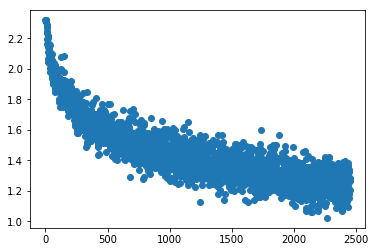

In [11]:
plt.plot(solver.loss_history, 'o', label='update_rule')

# Test your model!
Run your best model on the validation and test sets. You should achieve above 50% accuracy on the validation set.

In [12]:
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(best_model.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Validation set accuracy:  0.528
Test set accuracy:  0.507
